In [21]:
import pandas as pd
import csv

# Correct reading for your file: tab characters inside quotes
df = pd.read_csv('marketing_campaign.csv', sep='\t', engine='python', quoting=csv.QUOTE_NONE)

# Show first 5 rows
print(df.head())

     "ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  "5524        1957  Graduation         Single  58138.0        0         0   
1  "2174        1954  Graduation         Single  46344.0        1         1   
2  "4141        1965  Graduation       Together  71613.0        0         0   
3  "6182        1984  Graduation       Together  26646.0        1         0   
4  "5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        

In [22]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 "ID                     0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response"               0
dtype: int64


In [23]:
# Step 2: Drop rows with missing income
df = df.dropna(subset=['Income'])
print(df)

         "ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      "5524        1957  Graduation         Single  58138.0        0   
1      "2174        1954  Graduation         Single  46344.0        1   
2      "4141        1965  Graduation       Together  71613.0        0   
3      "6182        1984  Graduation       Together  26646.0        1   
4      "5324        1981         PhD        Married  58293.0        1   
...      ...         ...         ...            ...      ...      ...   
2235  "10870        1967  Graduation        Married  61223.0        0   
2236   "4001        1946         PhD       Together  64014.0        2   
2237   "7270        1981  Graduation       Divorced  56981.0        0   
2238   "8235        1956      Master       Together  69245.0        0   
2239   "9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...

In [24]:
# Step 3: Create Age column
df['Age'] = 2025 - df['Year_Birth']

print(df)



         "ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      "5524        1957  Graduation         Single  58138.0        0   
1      "2174        1954  Graduation         Single  46344.0        1   
2      "4141        1965  Graduation       Together  71613.0        0   
3      "6182        1984  Graduation       Together  26646.0        1   
4      "5324        1981         PhD        Married  58293.0        1   
...      ...         ...         ...            ...      ...      ...   
2235  "10870        1967  Graduation        Married  61223.0        0   
2236   "4001        1946         PhD       Together  64014.0        2   
2237   "7270        1981  Graduation       Divorced  56981.0        0   
2238   "8235        1956      Master       Together  69245.0        0   
2239   "9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  04-09-2012       58       635  ...     

In [25]:
print(df.columns)

Index(['"ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response"',
       'Age'],
      dtype='object')


In [26]:
# Step 4: Create TotalSpend column
df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
print(df)

         "ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      "5524        1957  Graduation         Single  58138.0        0   
1      "2174        1954  Graduation         Single  46344.0        1   
2      "4141        1965  Graduation       Together  71613.0        0   
3      "6182        1984  Graduation       Together  26646.0        1   
4      "5324        1981         PhD        Married  58293.0        1   
...      ...         ...         ...            ...      ...      ...   
2235  "10870        1967  Graduation        Married  61223.0        0   
2236   "4001        1946         PhD       Together  64014.0        2   
2237   "7270        1981  Graduation       Divorced  56981.0        0   
2238   "8235        1956      Master       Together  69245.0        0   
2239   "9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0  04-09-2012       58       635  ...     

In [27]:
# Step 5: Create Family_Size column = 1 (customer) + Kidhome + Teenhome
df['Family_Size'] = 1 + df['Kidhome'] + df['Teenhome']
print(df)

         "ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      "5524        1957  Graduation         Single  58138.0        0   
1      "2174        1954  Graduation         Single  46344.0        1   
2      "4141        1965  Graduation       Together  71613.0        0   
3      "6182        1984  Graduation       Together  26646.0        1   
4      "5324        1981         PhD        Married  58293.0        1   
...      ...         ...         ...            ...      ...      ...   
2235  "10870        1967  Graduation        Married  61223.0        0   
2236   "4001        1946         PhD       Together  64014.0        2   
2237   "7270        1981  Graduation       Divorced  56981.0        0   
2238   "8235        1956      Master       Together  69245.0        0   
2239   "9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
0            0  04-09-2012       58       635  ...     

In [28]:
# Step 6: Drop columns not needed
df.drop(columns=['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], errors='ignore', inplace=True)
print(df)

         "ID   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0      "5524  Graduation         Single  58138.0        0         0       58   
1      "2174  Graduation         Single  46344.0        1         1       38   
2      "4141  Graduation       Together  71613.0        0         0       26   
3      "6182  Graduation       Together  26646.0        1         0       26   
4      "5324         PhD        Married  58293.0        1         0       94   
...      ...         ...            ...      ...      ...       ...      ...   
2235  "10870  Graduation        Married  61223.0        0         1       46   
2236   "4001         PhD       Together  64014.0        2         1       56   
2237   "7270  Graduation       Divorced  56981.0        0         0       91   
2238   "8235      Master       Together  69245.0        0         1        8   
2239   "9405         PhD        Married  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProdu

In [29]:
print(df.columns.tolist())

['"ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response"', 'Age', 'TotalSpend', 'Family_Size']


In [30]:
#Step 7: View cleaned data
print("\nCleaned Data Preview:\n", df.head())


Cleaned Data Preview:
      "ID   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0  "5524  Graduation         Single  58138.0        0         0       58   
1  "2174  Graduation         Single  46344.0        1         1       38   
2  "4141  Graduation       Together  71613.0        0         0       26   
3  "6182  Graduation       Together  26646.0        1         0       26   
4  "5324         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  AcceptedCmp4  \
0       635         88              546  ...             0             0   
1        11          1                6  ...             0             0   
2       426         49              127  ...             0             0   
3        11          4               20  ...             0             0   
4       173         43              118  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Respons

In [11]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:\n", cat_cols)

# Step 2: Apply Label Encoding to each categorical column
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Encoding complete.")
print(df[cat_cols].head())  # Show a preview of the encoded columns

Categorical Columns:
 Index(['"ID', 'Education', 'Marital_Status', 'Response"'], dtype='object')
✅ Encoding complete.
    "ID  Education  Marital_Status  Response"
0  1303          2               4          1
1   526          2               4          0
2   972          2               5          0
3  1438          2               5          0
4  1263          4               3          0


In [12]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   "ID                  2240 non-null   int32  
 1   Education            2240 non-null   int32  
 2   Marital_Status       2240 non-null   int32  
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

"ID                     0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response"               0
TotalSpend              0
Family_Size             0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

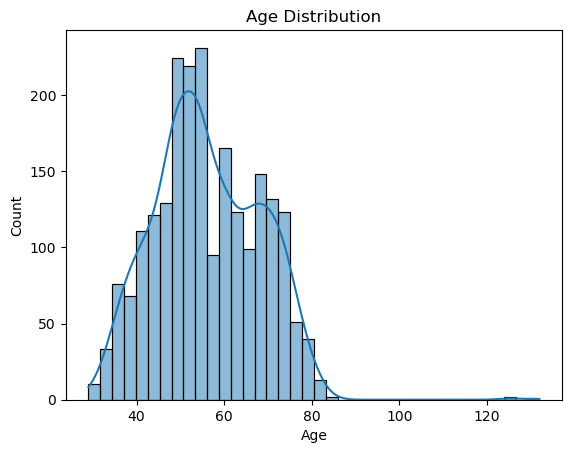

In [31]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

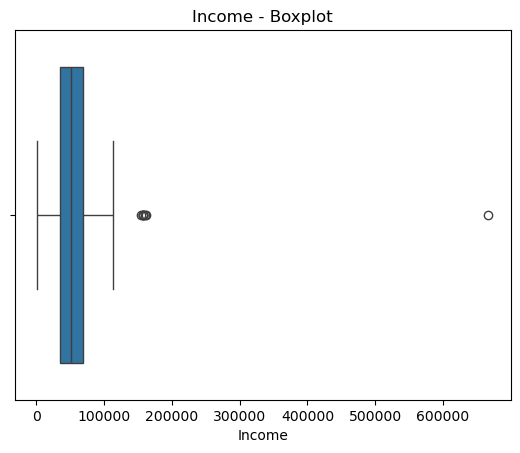

In [32]:
sns.boxplot(x=df['Income'])
plt.title("Income - Boxplot")
plt.show()

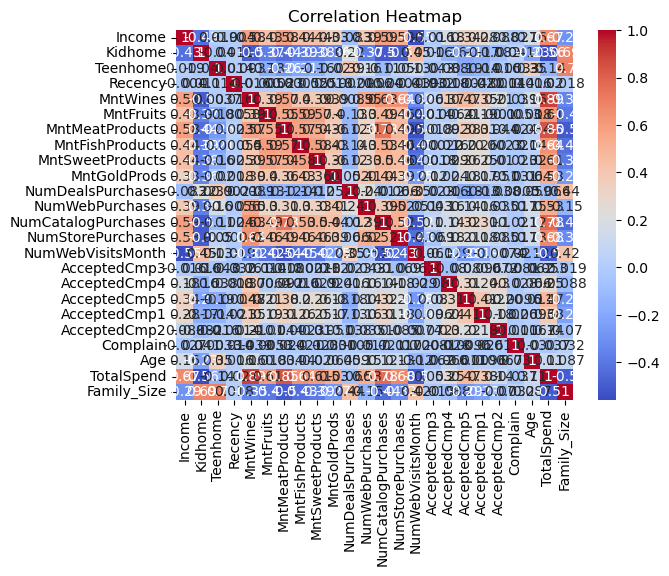

In [34]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Normalize
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_cols)

# Convert back to DataFrame
#normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols.columns)


In [41]:
print (df)


         "ID   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0      "5524  Graduation         Single  58138.0        0         0       58   
1      "2174  Graduation         Single  46344.0        1         1       38   
2      "4141  Graduation       Together  71613.0        0         0       26   
3      "6182  Graduation       Together  26646.0        1         0       26   
4      "5324         PhD        Married  58293.0        1         0       94   
...      ...         ...            ...      ...      ...       ...      ...   
2235  "10870  Graduation        Married  61223.0        0         1       46   
2236   "4001         PhD       Together  64014.0        2         1       56   
2237   "7270  Graduation       Divorced  56981.0        0         0       91   
2238   "8235      Master       Together  69245.0        0         1        8   
2239   "9405         PhD        Married  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProdu